# 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV

# 2. Data Loading & Splitting

In [2]:
# Load dataset
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.93,37.28,34.0,2422.0,370.0,1010.0,395.0,5.6494,376200.0,<1H OCEAN
1,-116.25,33.69,5.0,1664.0,444.0,907.0,374.0,2.7667,92900.0,INLAND
2,-118.35,33.97,25.0,1864.0,616.0,1710.0,575.0,2.2303,159400.0,<1H OCEAN
3,-120.08,36.79,38.0,1446.0,285.0,928.0,255.0,2.9808,89600.0,INLAND
4,-117.84,34.12,25.0,3465.0,566.0,1722.0,536.0,4.8304,228900.0,INLAND


In [4]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Size of Dataset
R = df.shape[0]
C = df.shape[1]
print(f"Number of rows: {R}")
print(f"Number of columns: {C}")

Number of rows: 20640
Number of columns: 10


In [6]:
# Get testing data
df_test = df.iloc[:R//5, :]
df_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.93,37.28,34.0,2422.0,370.0,1010.0,395.0,5.6494,376200.0,<1H OCEAN
1,-116.25,33.69,5.0,1664.0,444.0,907.0,374.0,2.7667,92900.0,INLAND
2,-118.35,33.97,25.0,1864.0,616.0,1710.0,575.0,2.2303,159400.0,<1H OCEAN
3,-120.08,36.79,38.0,1446.0,285.0,928.0,255.0,2.9808,89600.0,INLAND
4,-117.84,34.12,25.0,3465.0,566.0,1722.0,536.0,4.8304,228900.0,INLAND


In [7]:
# Display the shape
print(f"Number of rows: {df_test.shape[0]}")
print(f"Number of columns: {df_test.shape[1]}")

Number of rows: 4128
Number of columns: 10


In [8]:
# Get training data
df_train = df.iloc[R//5:, :]
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4128,-117.83,33.80,30.0,4713.0,758.0,2271.0,730.0,5.8622,221000.0,<1H OCEAN
4129,-117.34,33.16,24.0,1006.0,277.0,610.0,246.0,2.2500,187500.0,NEAR OCEAN
4130,-118.31,34.08,30.0,1390.0,457.0,1460.0,423.0,2.2422,254500.0,<1H OCEAN
4131,-117.25,32.78,21.0,1479.0,484.0,658.0,384.0,2.4500,350000.0,NEAR OCEAN
4132,-118.01,33.84,28.0,4097.0,838.0,2112.0,803.0,4.5000,202100.0,<1H OCEAN


In [9]:
# Display the shape
print(f"Number of rows: {df_train.shape[0]}")
print(f"Number of columns: {df_train.shape[1]}")

Number of rows: 16512
Number of columns: 10


# 3. EDA & Data Preprocessing

### 3.1 Training Data

In [10]:
# Size of Dataset
print(f"Number of rows: {df_train.shape[0]}")
print(f"Number of columns: {df_train.shape[1]}")

Number of rows: 16512
Number of columns: 10


In [ ]:
# # Drop unnecessary columns
# df_train = df_train.drop(['Unnamed: 0'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train.columns

In [11]:
# Remove duplicated columns
# This will retain the first occurrences, change as you want
dup_cols = df_train.columns.duplicated()
cols = list(df_train.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

df_train = df_train.loc[:,~df_train.columns.duplicated()].copy()

print("After removing...")

dup_cols = df_train.columns.duplicated()
cols = list(df_train.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

Duplicated Columns: 
[]
After removing...
Duplicated Columns: 
[]


In [12]:
# Check for missing values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 4128 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16346 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [13]:
# Remove row with missing values
df_train = df_train.dropna()
df_train = df_train.reset_index(drop=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16346 entries, 0 to 16345
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16346 non-null  float64
 1   latitude            16346 non-null  float64
 2   housing_median_age  16346 non-null  float64
 3   total_rooms         16346 non-null  float64
 4   total_bedrooms      16346 non-null  float64
 5   population          16346 non-null  float64
 6   households          16346 non-null  float64
 7   median_income       16346 non-null  float64
 8   median_house_value  16346 non-null  float64
 9   ocean_proximity     16346 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.2+ MB


In [14]:
# Drop duplicated rows
print("Number of duplicated rows:", df_train.shape[0] - df_train.drop_duplicates().shape[0])
df_train = df_train.drop_duplicates()
df_train = df_train.reset_index(drop=True)
print()
print("Removing duplicates...")
print()
print("Number of duplicated rows:", df_train.shape[0] - df_train.drop_duplicates().shape[0])

Number of duplicated rows: 0

Removing duplicates...

Number of duplicated rows: 0


In [ ]:
# # Rename columns
# headers = ["carat", "cut", "color",
#            "clarity", "depth (%)", "table", "price", 
#            "length (mm)", "width (mm)", "depth (mm)"]
# df_train.columns = headers
# df_train.columns

In [15]:
# Show unique values on each X's columns
X = df_train.drop(['median_house_value'], axis=1)

for col in X.columns:
    print(X[col].value_counts())

longitude
-118.31    127
-118.30    120
-118.28    118
-118.32    110
-118.29    110
          ... 
-123.88      1
-116.82      1
-114.94      1
-116.12      1
-115.95      1
Name: count, Length: 824, dtype: int64
latitude
34.05    192
34.06    188
34.08    188
34.07    180
34.04    174
        ... 
36.45      1
33.32      1
41.61      1
34.92      1
41.15      1
Name: count, Length: 844, dtype: int64
housing_median_age
52.0    1012
36.0     678
35.0     666
16.0     624
17.0     555
34.0     550
33.0     495
26.0     483
32.0     455
25.0     446
37.0     433
18.0     430
15.0     415
19.0     399
27.0     389
30.0     381
20.0     380
28.0     374
24.0     371
31.0     357
21.0     354
29.0     344
23.0     343
14.0     317
22.0     307
38.0     299
42.0     288
43.0     284
39.0     284
44.0     284
40.0     246
41.0     234
13.0     234
45.0     226
10.0     214
11.0     205
46.0     201
5.0      189
12.0     187
8.0      176
9.0      170
47.0     156
4.0      146
48.0     139
7.0 

In [ ]:
# # Drop poor features (to avoid overfitting)
# df_train = df_train.drop(['VendorID'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train = df_train.drop(['payment_type'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train.columns

In [ ]:
# # Remove X's invalid row
# df_train = df_train[df_train["Bare Nuclei"] != "?"]

# X = df_train.drop(['Class'], axis=1)

# for col in X.columns:
#     print(X[col].value_counts())

In [16]:
# Check invalid datatypes
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16346 entries, 0 to 16345
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16346 non-null  float64
 1   latitude            16346 non-null  float64
 2   housing_median_age  16346 non-null  float64
 3   total_rooms         16346 non-null  float64
 4   total_bedrooms      16346 non-null  float64
 5   population          16346 non-null  float64
 6   households          16346 non-null  float64
 7   median_income       16346 non-null  float64
 8   median_house_value  16346 non-null  float64
 9   ocean_proximity     16346 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.2+ MB


In [ ]:
# # Change the data type of X's invalid columns
# df_train["Target class"] = df_train["Target class"].astype("int64")
# df_train.info()

In [17]:
# Show unique values on y's column
y = df_train['median_house_value']

print(f"Number of rows: {y.shape[0]}\n")

print(y.value_counts())

Number of rows: 16346

median_house_value
500001.0    762
137500.0     95
162500.0     90
225000.0     82
112500.0     80
           ... 
342000.0      1
445000.0      1
415600.0      1
320100.0      1
316600.0      1
Name: count, Length: 3668, dtype: int64


In [ ]:
# # Remove y's invalid row
# df_train = df_train[df_train["Bare Nuclei"] != "?"]

# y = df_train['Class']

# for col in X.columns:
#     print(X[col].value_counts())

In [ ]:
# # Change the data type of y's invalid column
# df_train["Bare Nuclei"] = df_train["Bare Nuclei"].astype("int64")
# df_train.info()

In [18]:
# Show categorical columns
categorical_cols = list(set(df_train.columns.to_list()) - set(df_train._get_numeric_data().columns.to_list()))

print("Categorical columns:")
print(sorted(categorical_cols))

Categorical columns:
['ocean_proximity']


In [19]:
# Show unique values in categorical columns
unique_values = []

for col in categorical_cols:
    unique_value = [col]
    unique_value.append(", ".join(df_train[col].unique()))
    unique_values.append(unique_value)

pd.DataFrame(unique_values, columns=["col", "unique values"])

,col,unique values
0,ocean_proximity,"<1H OCEAN, NEAR OCEAN, INLAND, NEAR BAY, ISLAND"


In [20]:
# Encode nominal data
df_train = pd.get_dummies(df_train, columns=['ocean_proximity'], drop_first=True)
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-117.83,33.80,30.0,4713.0,758.0,2271.0,730.0,5.8622,221000.0,False,False,False,False
1,-117.34,33.16,24.0,1006.0,277.0,610.0,246.0,2.2500,187500.0,False,False,False,True
2,-118.31,34.08,30.0,1390.0,457.0,1460.0,423.0,2.2422,254500.0,False,False,False,False
3,-117.25,32.78,21.0,1479.0,484.0,658.0,384.0,2.4500,350000.0,False,False,False,True
4,-118.01,33.84,28.0,4097.0,838.0,2112.0,803.0,4.5000,202100.0,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,-116.96,32.80,16.0,3920.0,1094.0,2612.0,1023.0,1.3291,120800.0,False,False,False,False
16342,-116.95,32.96,18.0,2087.0,353.0,992.0,329.0,4.5000,222600.0,False,False,False,False
16343,-117.41,33.97,24.0,950.0,183.0,383.0,182.0,3.0694,125000.0,True,False,False,False
16344,-117.20,32.79,31.0,3417.0,533.0,1245.0,532.0,4.7788,276000.0,False,False,False,True


In [ ]:
# # Encode ordinal data

# enc_maps = {
#     "cut" : [{'col': "cut", 'mapping': {"Fair": 0, "Good": 1, "Very Good": 2, "Premium": 3, "Ideal": 4}}],
#     "color" : [{'col': "color", 'mapping': {"D": 0, "E": 1, "F": 2, "G": 3, "H": 4, "I": 5, "J": 6}}],
#     "clarity" : [{'col': "clarity", 'mapping': {"FL": 0, "IF": 1, "VVS1": 2, "VVS2": 3, "VS1": 4, "VS2": 5, "SI1": 6, "SI2": 7, "l1": 8, "l2": 9, "l3": 10}}],
# }

# for col in categorical_cols:
#     enc_map = enc_maps[col]

#     enc = OrdinalEncoder(mapping=enc_map)
#     df_train = enc.fit_transform(df_train)


# df_train

<Axes: >

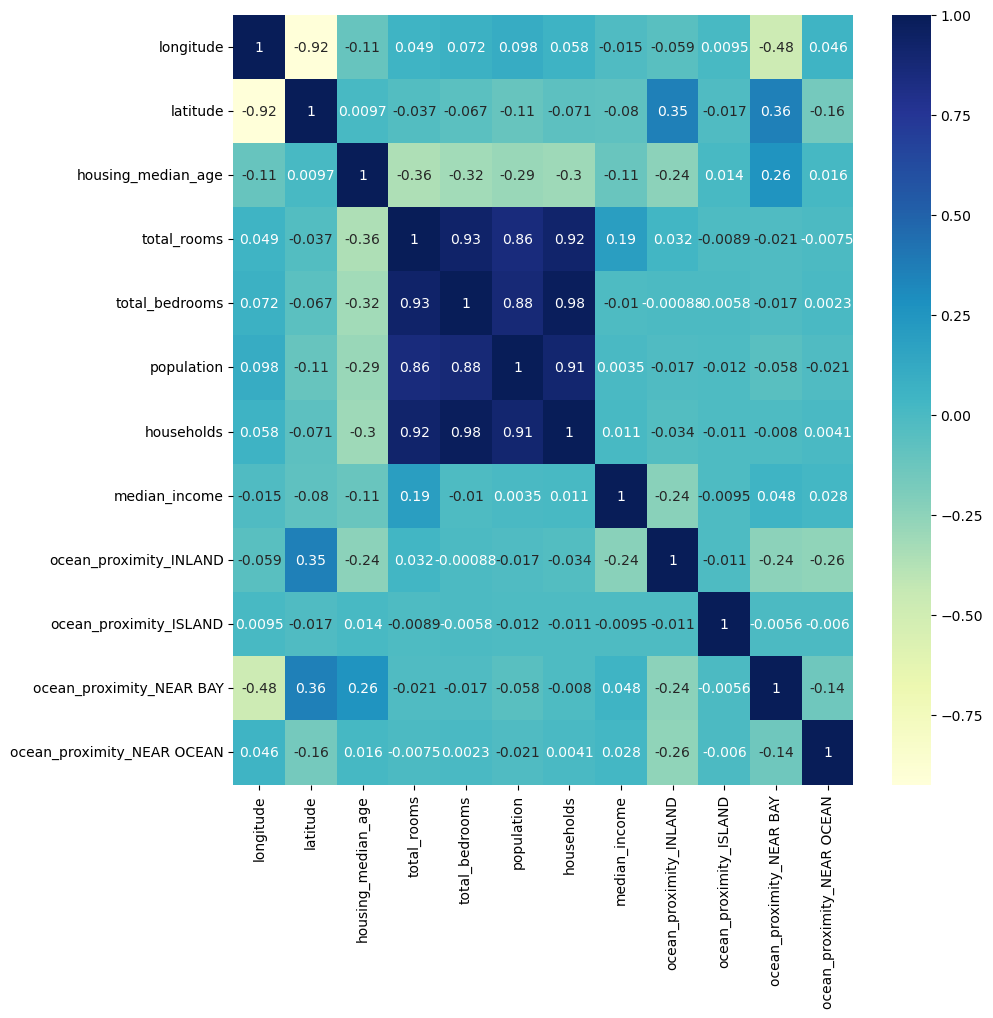

In [21]:
# Displaying heatmap
X = df_train.drop(['median_house_value'], axis=1)

plt.subplots(figsize=(10, 10))
sns.heatmap(X.corr(method="pearson"), cmap="YlGnBu", annot=True)

In [ ]:
# # Drop correlated features
# df_train = df_train.drop(['country'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train.columns

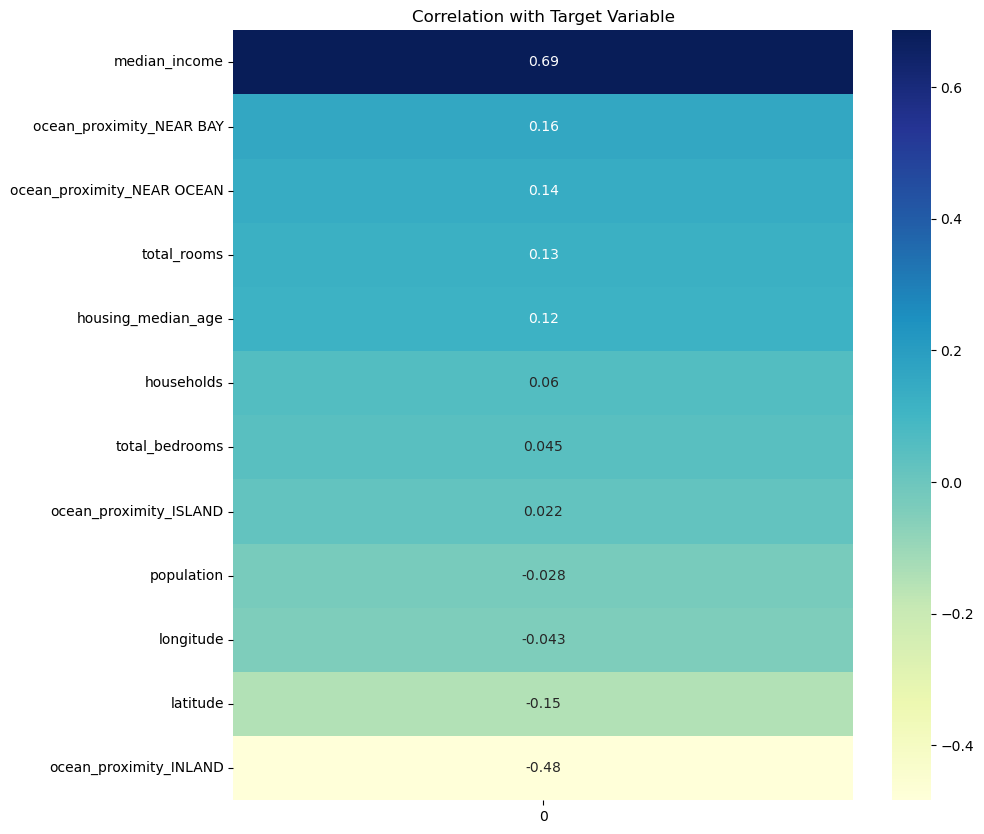

In [22]:
# Create a correlation matrix with target variable
X = df_train.drop(['median_house_value'], axis=1)
y = df_train['median_house_value']

corr_with_target = X.corrwith(y)
corr_with_target = corr_with_target.sort_values(ascending=False)
plt.figure(figsize=(10, 10))
sns.heatmap(corr_with_target.to_frame(), cmap='YlGnBu', annot=True)
plt.title('Correlation with Target Variable')
plt.show()

In [ ]:
# # Drop unimportant features
# df_train = df_train.drop(['country'], axis=1)
# df_train = df_train.reset_index(drop=True)
# df_train.columns

**Important**: We detect outliers BEFORE creating polynomial features because:
1. Polynomial features amplify outliers exponentially (outlier² creates extreme values)
2. One outlier affects multiple polynomial features simultaneously  
3. This prevents model instability in polynomial regression

Do it when the data is sufficient

In [23]:
# Show all numerical columns
numerical_columns = list(df_train.select_dtypes(include=[np.number]).columns.values)
numerical_columns

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [24]:
# Detect outliers
def detect_outliers_iqr(df, column):    
    """
    Detect outliers using IQR method
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

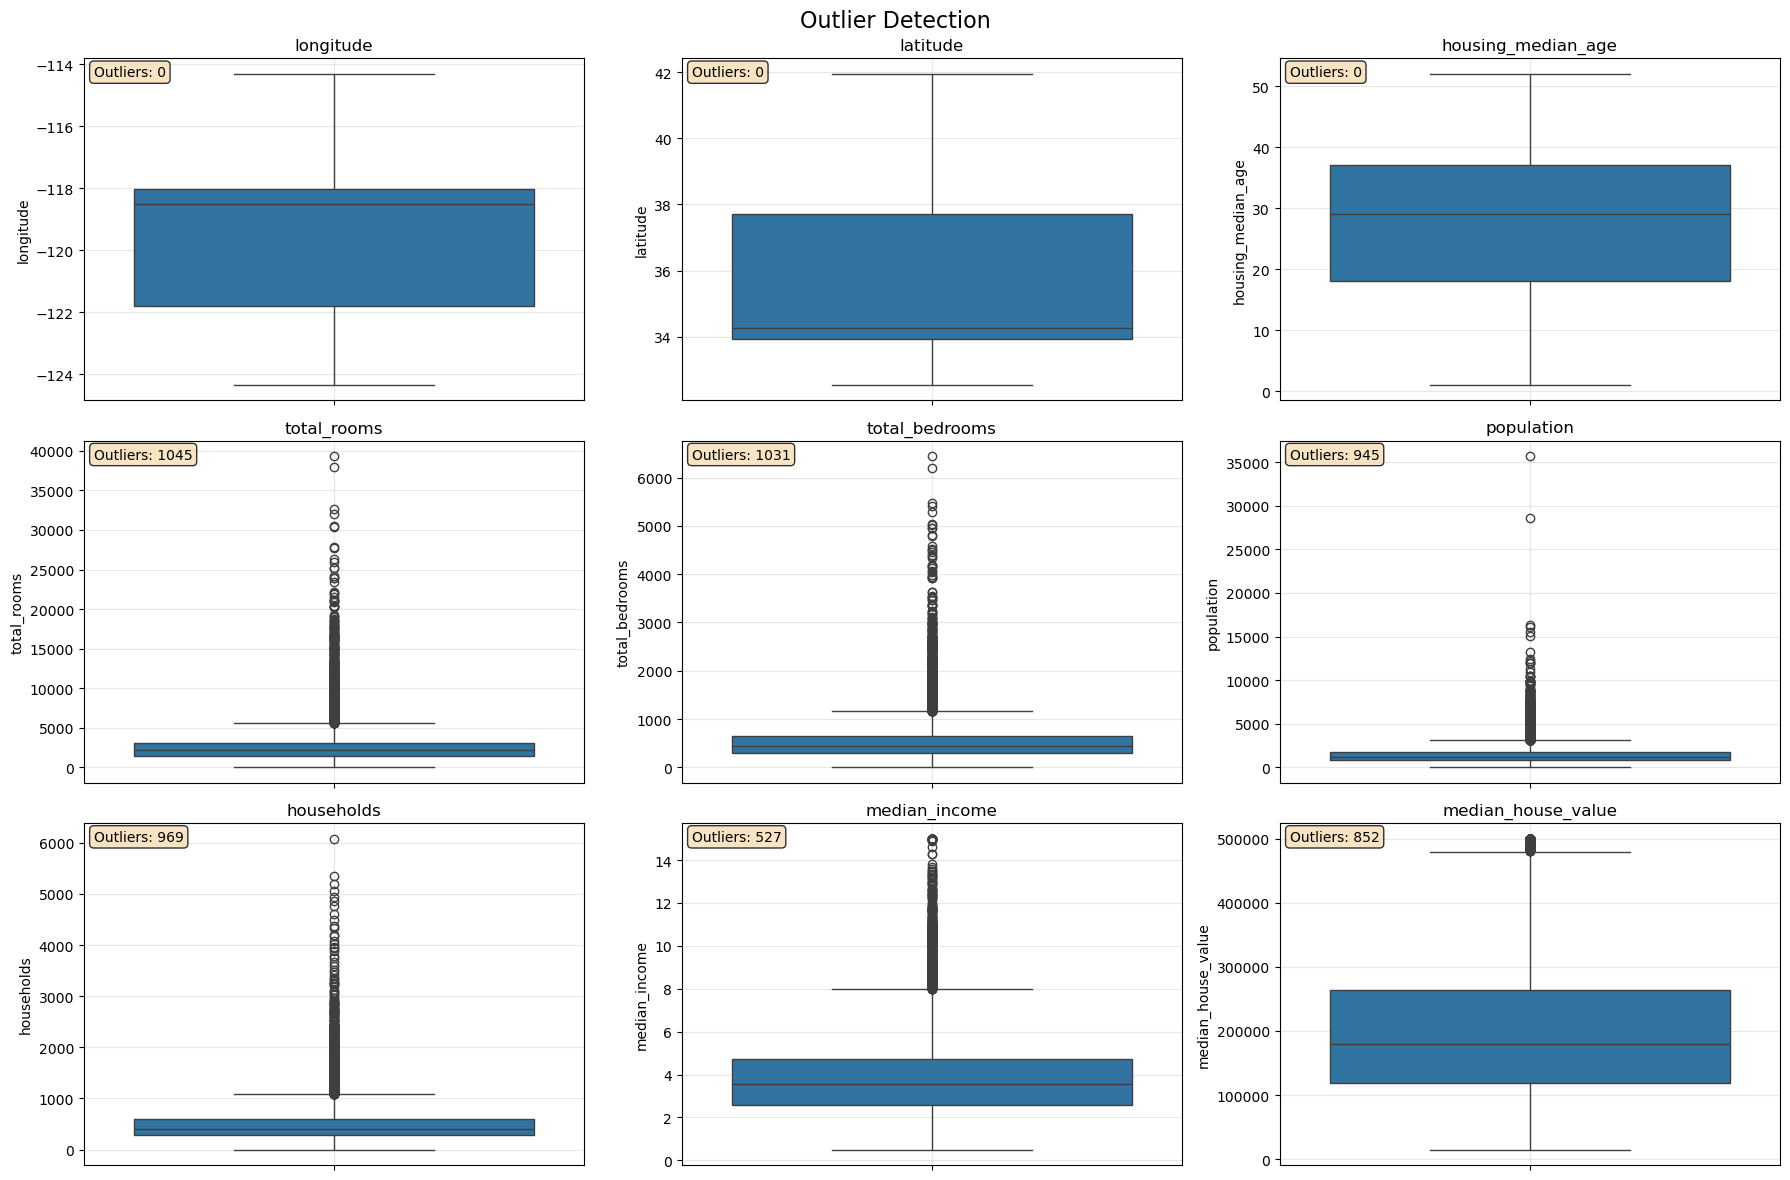

In [26]:
# Create box plots for all numerical features to visualize outliers
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('Outlier Detection', fontsize=16)

lower_bounds = dict()
upper_bounds = dict()

for i, col in enumerate(numerical_columns):
    row = i // 3
    col_idx = i % 3
    
    # Create box plot
    sns.boxplot(data=df_train, y=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col}')
    axes[row, col_idx].grid(True, alpha=0.3)
    
    # Add outlier count as text
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df_train, col)
    lower_bounds[col] = lower_bound
    upper_bounds[col] = upper_bound
    
    axes[row, col_idx].text(0.02, 0.98, f'Outliers: {len(outliers)}', 
                           transform=axes[row, col_idx].transAxes,
                           verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

In [27]:
# Remove same outliers

print(f"Number of rows: {df_train.shape[0]}")

print("\nRemoving outliers...\n")

outlier_condition = True
for col in numerical_columns:
    # A row is an outlier if it's OUTSIDE the bounds (< lower OR > upper)
    outlier_condition = outlier_condition & ((df_train[col] < lower_bounds[col]) | (df_train[col] > upper_bounds[col]))

# Remove rows that are outliers in ALL columns
df_train = df_train[~outlier_condition]
df_train = df_train.reset_index(drop=True)

print(f"Number of rows: {df_train.shape[0]}")

Number of rows: 16346

Removing outliers...

Number of rows: 16346


In [ ]:
# # Remove individual outliers (only if the dataset is big enough)

# print(f"Number of rows: {df_train.shape[0]}")

# print("\nRemoving outliers...\n")

# for i, col in enumerate(numerical_columns):
    
#     df_train = df_train[df_train[col] >= lower_bounds[col]]
#     df_train = df_train.reset_index(drop=True)
#     df_train = df_train[df_train[col] <= upper_bounds[col]]
#     df_train = df_train.reset_index(drop=True)
    
# print(f"Number of rows: {df_train.shape[0]}")

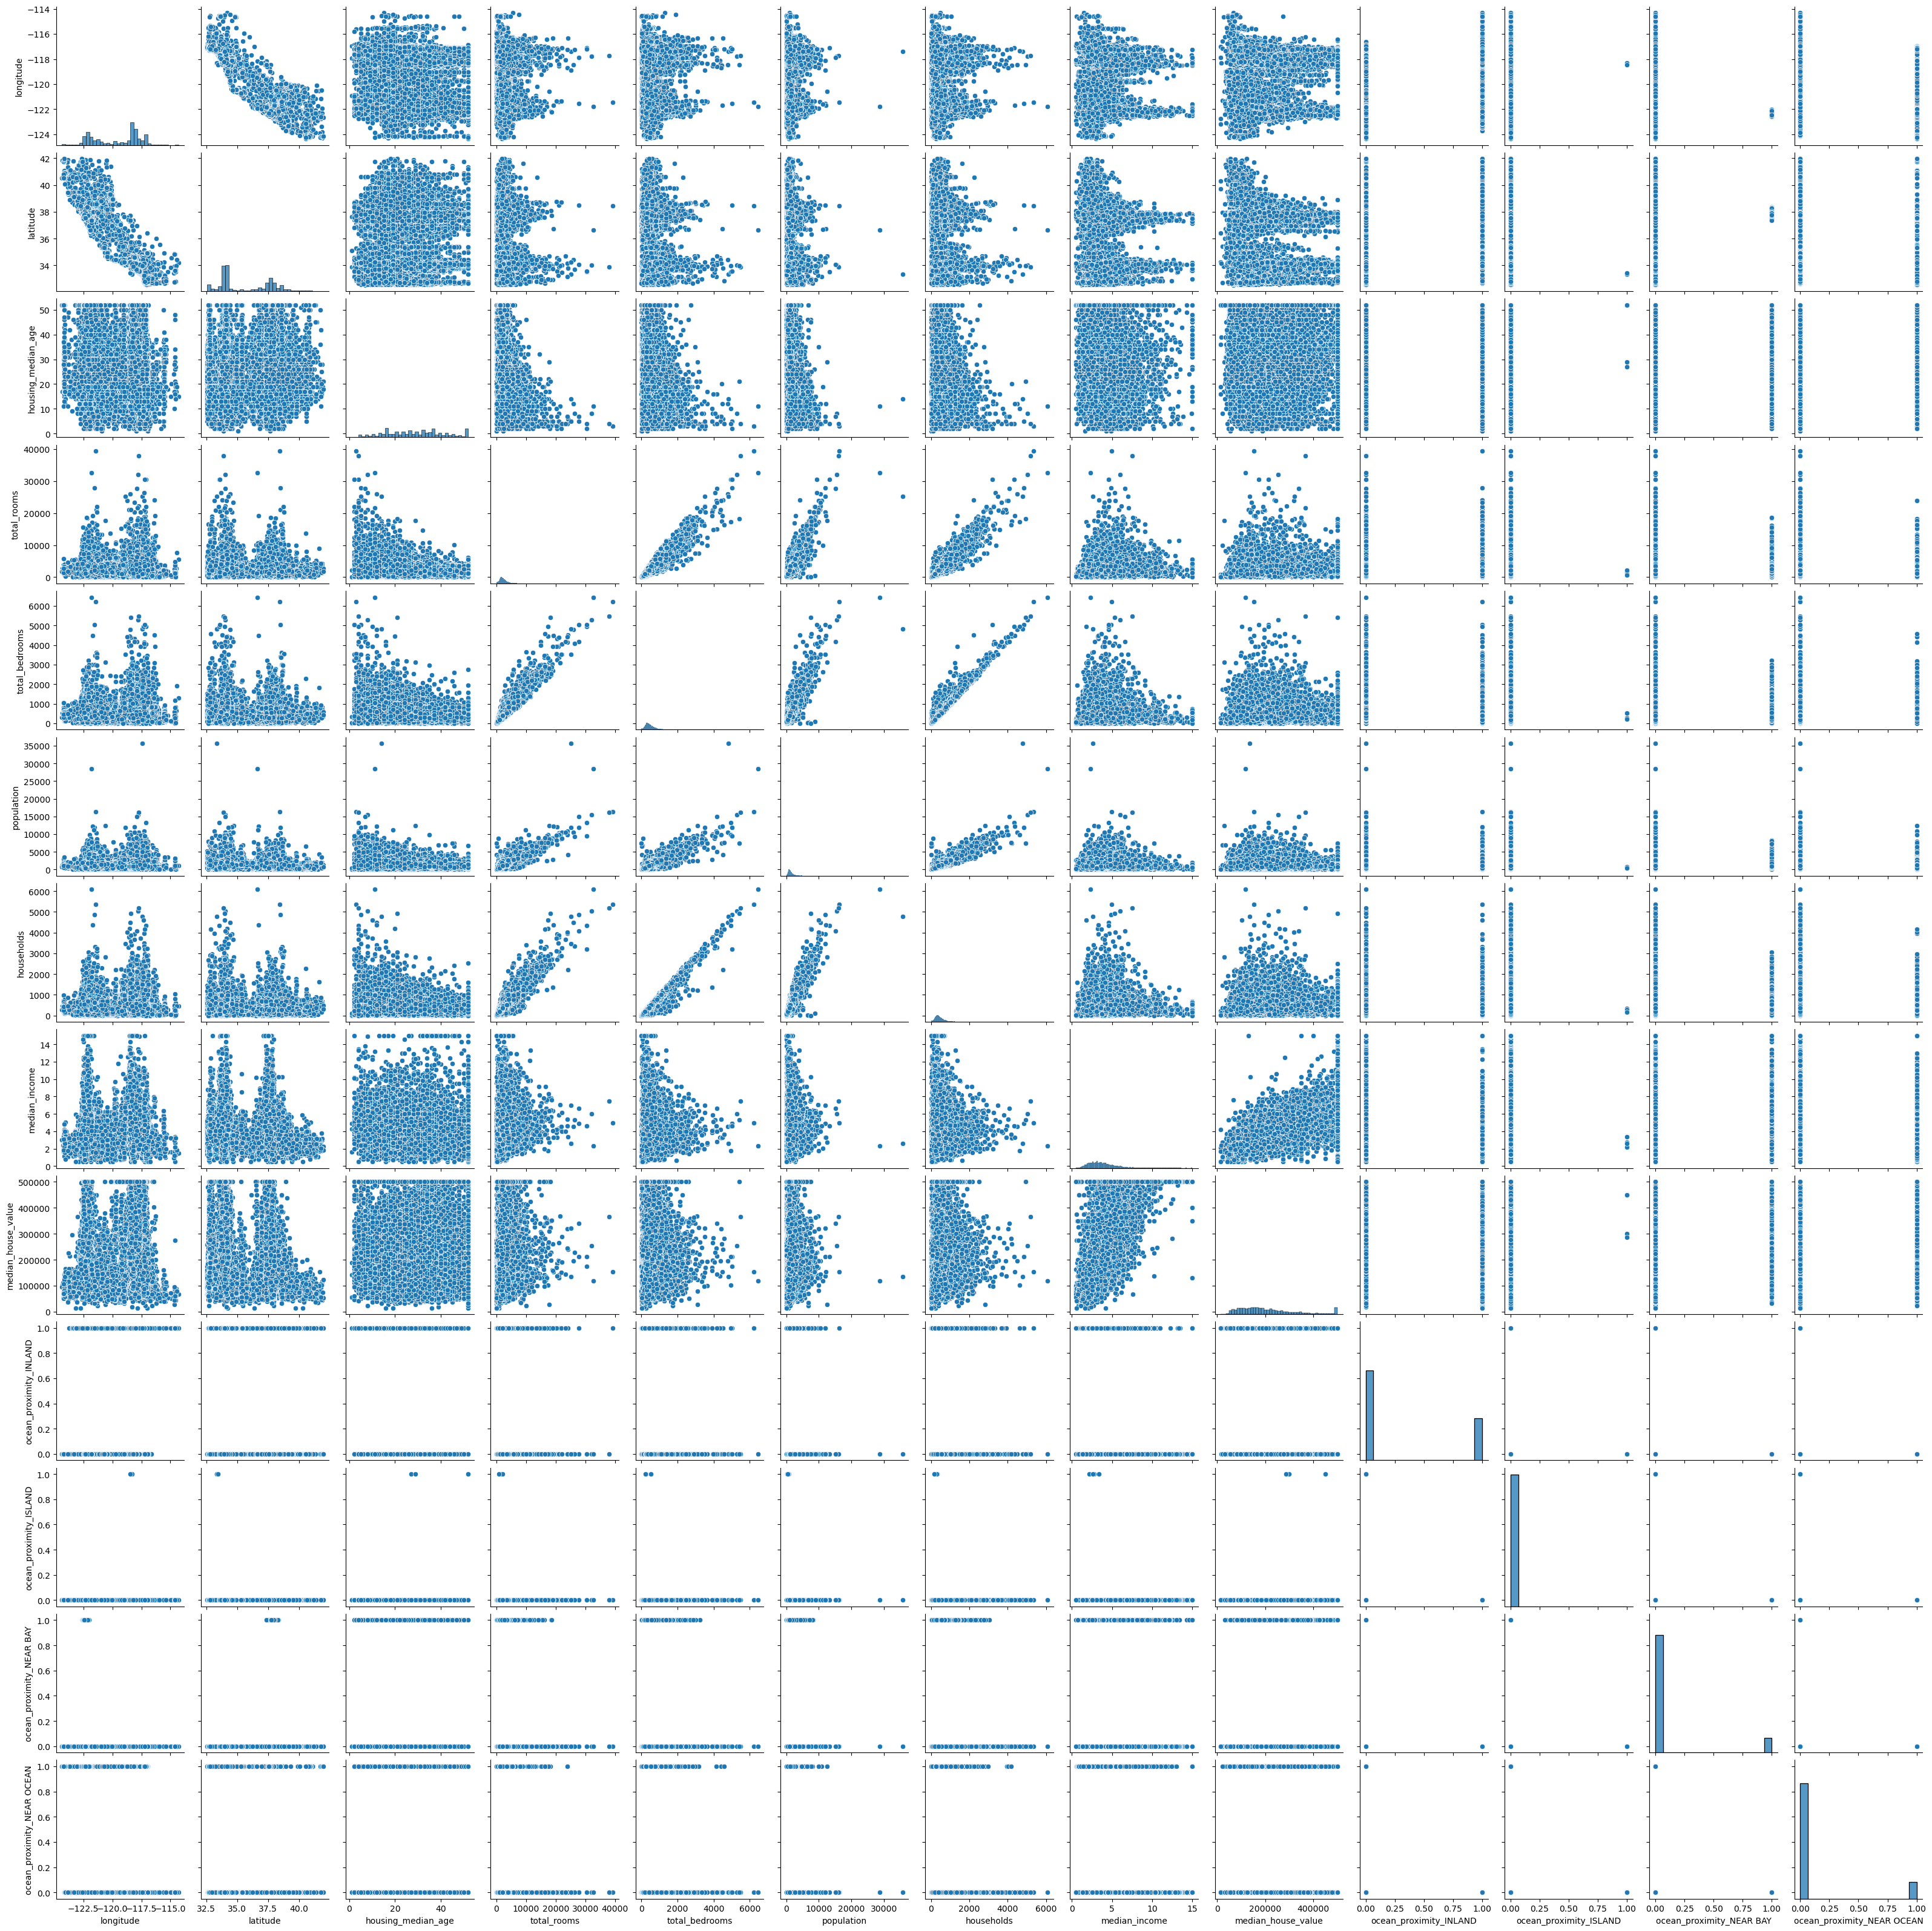

In [28]:
# Show the distribution of all columns
sns.pairplot(df_train)

In [29]:
# Show statistical information of the dataset
df_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000
mean,-119.576297,35.640015,28.650679,2625.463171,535.988988,1420.410314,497.492353,3.867336,206673.789184
std,2.007254,2.137633,12.614086,2189.138758,423.481373,1144.242499,383.425283,1.890995,115275.695055
min,-124.350000,32.540000,1.000000,6.000000,1.000000,5.000000,1.000000,0.499900,14999.000000
25%,-121.810000,33.930000,18.000000,1443.000000,294.250000,786.000000,279.000000,2.567075,119500.000000
50%,-118.500000,34.260000,29.000000,2124.000000,433.000000,1165.000000,408.000000,3.535700,179600.000000
75%,-118.010000,37.720000,37.000000,3121.750000,642.000000,1714.000000,600.000000,4.739600,263800.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [30]:
# Separate features and labels
y_train = df_train['median_house_value']
X_train = df_train.drop(['median_house_value'], axis=1)

In [ ]:
# # MinMax Scaling
# numeric_cols = X_train.select_dtypes(include='number').columns

# scaler_X = MinMaxScaler()

# X_train[numeric_cols] = scaler_X.fit_transform(X_train[numeric_cols])
# pd.DataFrame(y_train, columns=['median_house_value'])

In [31]:
X_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000
mean,-119.576297,35.640015,28.650679,2625.463171,535.988988,1420.410314,497.492353,3.867336
std,2.007254,2.137633,12.614086,2189.138758,423.481373,1144.242499,383.425283,1.890995
min,-124.350000,32.540000,1.000000,6.000000,1.000000,5.000000,1.000000,0.499900
25%,-121.810000,33.930000,18.000000,1443.000000,294.250000,786.000000,279.000000,2.567075
50%,-118.500000,34.260000,29.000000,2124.000000,433.000000,1165.000000,408.000000,3.535700
75%,-118.010000,37.720000,37.000000,3121.750000,642.000000,1714.000000,600.000000,4.739600
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


### 3.2 Testing Data

In [32]:
# Size of Dataset
print(f"Number of rows: {df_test.shape[0]}")
print(f"Number of columns: {df_test.shape[1]}")

Number of rows: 4128
Number of columns: 10


In [ ]:
# # Drop unnecessary columns
# df_test = df_test.drop(['Unnamed: 0'], axis=1)
# df_test = df_test.reset_index(drop=True)
# df_test.columns

In [33]:
# Remove duplicated columns
# This will retain the first occurrences, change as you want
dup_cols = df_test.columns.duplicated()
cols = list(df_test.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

df_test = df_test.loc[:,~df_test.columns.duplicated()].copy()

print("After removing...")

dup_cols = df_test.columns.duplicated()
cols = list(df_test.columns)
print(f"Duplicated Columns: \n{[cols[i] for i in range(len(cols)) if dup_cols[i]]}")

Duplicated Columns: 
[]
After removing...
Duplicated Columns: 
[]


In [34]:
# Remove row with missing values
df_test = df_test.dropna()
df_test = df_test.reset_index(drop=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4087 entries, 0 to 4086
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4087 non-null   float64
 1   latitude            4087 non-null   float64
 2   housing_median_age  4087 non-null   float64
 3   total_rooms         4087 non-null   float64
 4   total_bedrooms      4087 non-null   float64
 5   population          4087 non-null   float64
 6   households          4087 non-null   float64
 7   median_income       4087 non-null   float64
 8   median_house_value  4087 non-null   float64
 9   ocean_proximity     4087 non-null   object 
dtypes: float64(9), object(1)
memory usage: 319.4+ KB


In [ ]:
# # Rename columns
# headers = ["carat", "cut", "color",
#            "clarity", "depth (%)", "table", "price", 
#            "length (mm)", "width (mm)", "depth (mm)"]
# df_test.columns = headers
# df_test.columns

In [ ]:
# # Drop poor features (to avoid overfitting)
# df_test = df_test.drop(['VendorID'], axis=1)
# df_test = df_test.reset_index(drop=True)
# df_test = df_test.drop(['payment_type'], axis=1)
# df_test = df_test.reset_index(drop=True)
# df_test.columns

In [ ]:
# # Remove X's invalid row
# df_test = df_test[df_test["Bare Nuclei"] != "?"]

# X = df_test.drop(['Class'], axis=1)

# for col in X.columns:
#     print(X[col].value_counts())

In [ ]:
# # Change the data type of X's invalid columns
# df_test["Bare Nuclei"] = df_test["Bare Nuclei"].astype("int64")
# df_test.info()

In [ ]:
# # Remove y's invalid row
# df_test = df_test[df_test["Bare Nuclei"] != "?"]

# y = df_test['Class']

# for col in X.columns:
#     print(X[col].value_counts())

In [ ]:
# # Change the data type of y's invalid column
# df_test["Bare Nuclei"] = df_test["Bare Nuclei"].astype("int64")
# df_test.info()

In [35]:
# Encode nominal data
df_test = pd.get_dummies(df_test, columns=['ocean_proximity'], drop_first=True)
df_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-121.93,37.28,34.0,2422.0,370.0,1010.0,395.0,5.6494,376200.0,False,False,False,False
1,-116.25,33.69,5.0,1664.0,444.0,907.0,374.0,2.7667,92900.0,True,False,False,False
2,-118.35,33.97,25.0,1864.0,616.0,1710.0,575.0,2.2303,159400.0,False,False,False,False
3,-120.08,36.79,38.0,1446.0,285.0,928.0,255.0,2.9808,89600.0,True,False,False,False
4,-117.84,34.12,25.0,3465.0,566.0,1722.0,536.0,4.8304,228900.0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4082,-115.55,32.80,23.0,666.0,142.0,580.0,160.0,2.1136,61000.0,True,False,False,False
4083,-121.99,36.98,25.0,2113.0,422.0,1365.0,439.0,4.6484,234600.0,False,False,False,True
4084,-117.93,33.79,36.0,2363.0,403.0,1240.0,391.0,4.0909,190800.0,False,False,False,False
4085,-118.23,33.98,35.0,1366.0,496.0,2160.0,497.0,2.2059,150000.0,False,False,False,False


In [ ]:
# # Encode ordinal data
# categorical_cols = list(set(df_test.columns.to_list()) - set(df_test._get_numeric_data().columns.to_list()))

# enc_maps = {
#     "cut" : [{'col': "cut", 'mapping': {"Fair": 0, "Good": 1, "Very Good": 2, "Premium": 3, "Ideal": 4}}],
#     "color" : [{'col': "color", 'mapping': {"D": 0, "E": 1, "F": 2, "G": 3, "H": 4, "I": 5, "J": 6}}],
#     "clarity" : [{'col': "clarity", 'mapping': {"FL": 0, "IF": 1, "VVS1": 2, "VVS2": 3, "VS1": 4, "VS2": 5, "SI1": 6, "SI2": 7, "l1": 8, "l2": 9, "l3": 10}}],
# }

# for col in categorical_cols:
#     enc_map = enc_maps[col]

#     enc = OrdinalEncoder(mapping=enc_map)
#     df_test = enc.fit_transform(df_test)


# df_test

In [ ]:
# # Drop correlated features
# df_test = df_test.drop(['country'], axis=1)
# df_test = df_test.reset_index(drop=True)
# df_test.columns

In [ ]:
# # Drop unimportant features
# df_test = df_test.drop(['country'], axis=1)
# df_test = df_test.reset_index(drop=True)
# df_test.columns

In [36]:
# Separate features and labels
X_test = df_test.drop(['median_house_value'], axis=1)
y_test = df_test['median_house_value']

In [ ]:
# # MinMax Scaling
# numeric_cols = X_test.select_dtypes(include='number').columns

# scaler_X = MinMaxScaler()

# X_test[numeric_cols] = scaler_X.fit_transform(X_test[numeric_cols])

In [37]:
X_test.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000
mean,-119.548258,35.606048,28.562760,2680.663078,545.395889,1443.091265,507.196966,3.886463
std,1.988895,2.131243,12.503584,2169.430297,412.859793,1087.906393,377.708746,1.932276
min,-124.300000,32.570000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.700000,33.930000,18.000000,1474.000000,301.000000,793.500000,284.000000,2.547700
50%,-118.480000,34.230000,28.000000,2143.000000,441.000000,1172.000000,417.000000,3.538500
75%,-118.010000,37.705000,37.000000,3220.000000,663.000000,1756.500000,615.000000,4.767300
max,-114.580000,41.860000,52.000000,30405.000000,4095.000000,12873.000000,3931.000000,15.000100


# 4. XGB Regressor

In [38]:
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [39]:
model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [40]:
# Evaluate the model

residual_df = None
resi = None

def evaluate_model(model, y_train, X_test, y_test):    
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    global residual_df
    residual_df = pd.DataFrame({'Y_Test': y_test, 'Y_Pred': y_pred, 'Residuals':(y_test-y_pred) }).head(5)
    
    print("Training error:")
    
    mae_train = mean_absolute_error(y_train, y_train_pred)
    print("MAE:", mae_train)
    mse_train = mean_squared_error(y_train, y_train_pred)
    print("MSE:", mse_train)
    rmse_train = math.sqrt(mse_train)
    print("RMSE:", rmse_train)
    r2_train = r2_score(y_train, y_train_pred)
    print("R^2:", r2_train)
    
    print("\nTest error:")
    
    mae = mean_absolute_error(y_test, y_pred)
    print("MAE:", mae)
    mse = mean_squared_error(y_test, y_pred)
    print("MSE:", mse)
    rmse = math.sqrt(mse)
    print("RMSE:", rmse)
    r2 = r2_score(y_test, y_pred)
    print("R^2:", r2)

evaluate_model(model, y_train, X_test, y_test)

Training error:
MAE: 20270.225278140486
MSE: 829496074.883061
RMSE: 28800.973505822003
R^2: 0.9375740146627604

Test error:
MAE: 31758.564389566003
MSE: 2288087017.1996965
RMSE: 47833.95255673209
R^2: 0.830163203225039


In [41]:
residual_df

,Y_Test,Y_Pred,Residuals
0,376200.0,296911.343750,79288.656250
1,92900.0,189331.250000,-96431.250000
2,159400.0,166668.468750,-7268.468750
3,89600.0,54765.285156,34834.714844
4,228900.0,187969.921875,40930.078125


# 5. Tuning

In [42]:
base_model = XGBRegressor(random_state=42)

params = {
    'n_estimators': [10, 25, 50, 75, 100, 125, 150, 175, 200],
    "grow_policy": ["depthwise", "lossguide"],
    "learning_rate": [0.01, 0.05, 0.1, 0.3, 0.6],
    
}

grid_search = GridSearchCV(estimator=base_model, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "r2")

In [43]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 90 candidates, totalling 360 fits
CPU times: total: 3.25 s
Wall time: 23.9 s


,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"{'grow_policy': ['depthwise', 'lossguide'], 'learning_rate': [0.01, 0.05, ...], 'n_estimators': [10, 25, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,4
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [44]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_grow_policy,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
71,0.739493,0.073480,0.019901,0.004415,lossguide,0.1,200,"{'grow_policy': 'lossguide', 'learning_rate': ...",0.836652,0.823794,0.834314,0.826571,0.830333,0.005308,1
26,0.689643,0.035921,0.019151,0.003436,depthwise,0.1,200,"{'grow_policy': 'depthwise', 'learning_rate': ...",0.836652,0.823794,0.834314,0.826571,0.830333,0.005308,1
25,0.810916,0.067365,0.023726,0.004148,depthwise,0.1,175,"{'grow_policy': 'depthwise', 'learning_rate': ...",0.835449,0.821788,0.833157,0.825482,0.828969,0.005551,3
70,0.638606,0.006316,0.016013,0.000925,lossguide,0.1,175,"{'grow_policy': 'lossguide', 'learning_rate': ...",0.835449,0.821788,0.833157,0.825482,0.828969,0.005551,3
24,0.869592,0.080030,0.021462,0.005951,depthwise,0.1,150,"{'grow_policy': 'depthwise', 'learning_rate': ...",0.834073,0.819614,0.832448,0.823364,0.827375,0.006060,5


In [45]:
best_params = grid_search.best_estimator_
best_params

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [46]:
# Evaluate the best model
evaluate_model(best_params, y_train, X_test, y_test)

Training error:
MAE: 22227.962854779074
MSE: 1013256924.9951683
RMSE: 31831.696860129345
R^2: 0.9237445916166365

Test error:
MAE: 30696.9068100838
MSE: 2138662217.427682
RMSE: 46245.67241837534
R^2: 0.8412544900341735


# 6. Testing Model (if test dataset exists)